

### Assignment 2 - Linear Regression


#### Problem Statement :

Using numpy, Implement Linear regression using gradient descent

(You can’t use scikit-learn)

Scoring Points -

Explain what a cost function is.

understanding of derivatives.

Should be able to explain the effects of having different learning rates.

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import matplotlib

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 20}

matplotlib.rc('font', **font)

In [30]:
df = pd.read_csv('data.csv')
df.head()

,32.502345269453031,31.70700584656992
0,53.426804,68.777596
1,61.530358,62.562382
2,47.475640,71.546632
3,59.813208,87.230925
4,55.142188,78.211518


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 2 columns):
32.502345269453031    99 non-null float64
31.70700584656992     99 non-null float64
dtypes: float64(2)
memory usage: 1.6 KB


In [32]:
data = np.loadtxt('data.csv', delimiter =',')
data.shape

(100, 2)

In [33]:
max = data.max(axis = 0)
min = data.min(axis = 0) 
data = (data - min)/ (max - min)
print(max)
print(min)

[ 70.34607562 118.5912173 ]
[25.12848465 31.70700585]


In [34]:
def data_split(data, test_size_, seed_ = 3):

    sequence = [i for i in range(data.shape[0])]
    random.seed(seed_)
    random.shuffle(sequence)
    test_sequence = sequence[:test_size_]
    train_sequence = sequence[test_size_:]

    train_x = data[train_sequence,0]
    train_y = data[train_sequence,1]
    test_x = data[test_sequence,0]
    test_y = data[test_sequence,1]

    figure, axis = plt.subplots(1, 2, figsize=(20, 8), dpi=80)

    axis[0].scatter(train_x, train_y, c= 'r', label ='Train_split')
    axis[0].scatter(test_x, test_y, c= 'b', label ='Test_split')
    axis[0].set_title('Split Data')
    axis[0].legend()


    axis[1].scatter(data[:,0], data[:,1], label ='Real')
    axis[1].set_title('Actutal data')
    axis[1].legend()

    plt.show()
    
    train_x = np.concatenate(
    (train_x[:,np.newaxis], np.ones((train_x.shape[0],1))) 
    , axis = 1)
    
    test_x = np.concatenate(
    (test_x[:,np.newaxis], np.ones((test_x.shape[0],1))) 
    , axis = 1)
    
    return train_x, train_y[:,np.newaxis], test_x, test_y[:,np.newaxis]
    
    

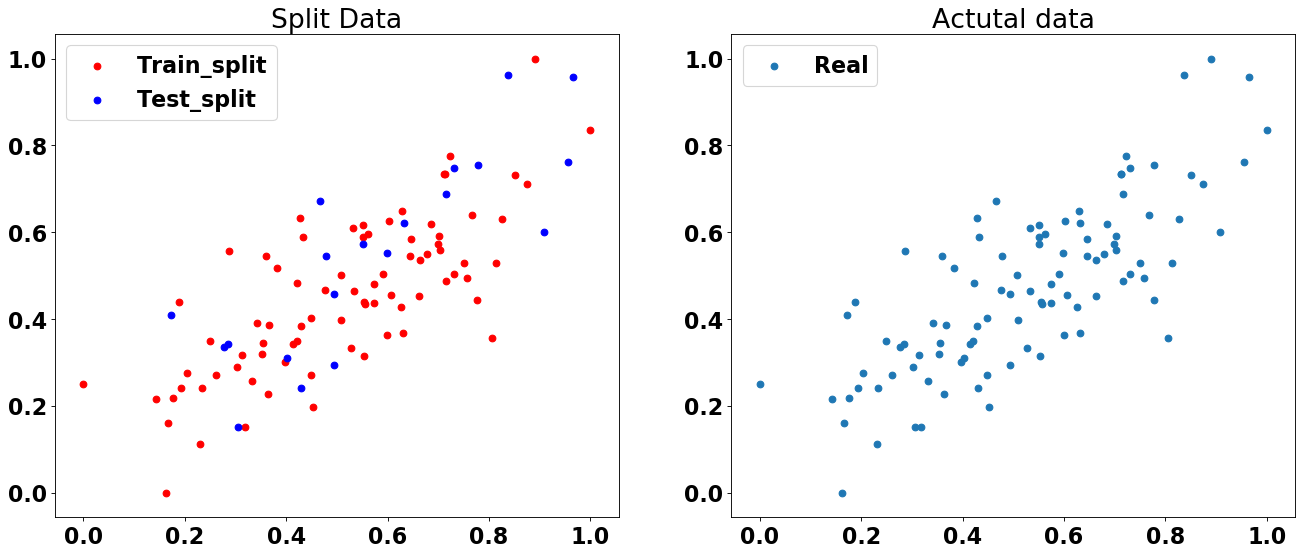

In [35]:
train_x, train_y, test_x, test_y = data_split(data, test_size_ = int( 0.2*data.shape[0]), seed_ = 21)

In [36]:
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_x.shape)

(80, 2)
(80, 1)
(20, 2)
(20, 2)


In [37]:
def compute_forward_pass(X,W):
    h = np.dot(X , W.T)
    return h

def compute_cost(h,y):
    m = y.shape[0]
    error = float(np.sum(
        (y - h)**2,
        axis = 0
    ).ravel())
    return (1/(2*m))*error

## Explain Cost Function - 

This is the cost function which lets us figure out how to fit the best straight line in out data. Cost function helps to measure the performance of a ML model for the given data. It calculates the difference between the predicted values and the expected values and gives a single real number as the output.

#### "compute_forward_pass"  function - 
We first calculate the a function known as hypothesis function which is the output of the regression alogorithm. The compute_forward_pass outputs this hypothesis.

We represent hypothesis as, 
    h(x) = b + wx = x*w + 1*b  = [1, x] * [b, w].T = np.dot(X, W.T) 
    
where
    
    w = the coefficient parameter or weight of the linear model.
    b = the constant or bias
    x = input variable/ parameter 
    h = hypothesis = the estimate value of target calculated by regression model.
    X = input matrix ( bias concatenated with feature vector )
    y = output vector ( "target" variables )

Therefore, this function takes some input x variable, then uses the parameter determined by a regression model and finally outputs a prediction vector based on that input also know as hypothesis (h) and returns its value
    
#### "compute_cost" function - 

Mean square Error loss Function is implemented as cost function which can be written as :

J = (1/(2*m)) * (summation (h(x_i) - y_i)**2)

h(x_i) = b + w*x_i

where, 

    J = cost functiuon
    x_i = ith input training example
    y_i = ith target training example
    h = hypothesis function
    b= bias
    w = parameter /weight
    m = number of training examples
    
    * Here we want to solve the minimization problem.
    * Minimize (h(x_i) - y_i)**2  - We have to minimize the difference between h(x) and y for each example.
    * Then sum this over the training set.
    * Dividing by 1/2m helps to determines the average score.
    * Therefore, we want to determine values of w and b which make the hypothesis as accurate as possible


In [38]:
def init_weight(a, b):
    return np.ones((a,b))

def compute_grad(X,h,y):
    m = y.shape[0]
    dW = np.transpose((np.dot(X.T, (h - y))) *(1/m))
    return dW

def update_grad(w,dw, lr):
    return w - lr*dw

def train_model( lr, n_epochs = 200):
    train_loss = []
    val_loss = []
    callback_count = 10
    w = init_weight(1,2) 
    for epoch in range(n_epochs):
        h = compute_forward_pass(train_x, w)
        j_train = compute_cost(h, train_y)
        train_loss.append(j_train)

        h_val = compute_forward_pass(test_x, w)
        j_val = compute_cost(h_val, test_y)
        val_loss.append(j_val)
        
        
        dw = compute_grad(train_x, h, train_y)
        w = update_grad(w,dw, lr)
        
        if(j_val > j_train):
            callback_count -= 1
            if(callback_count == -1):
                print("Learning Rate: {l} Epoch needed : {e}  Training Loss: {tl}  Validation Loss:{vl} ".format(l = lr,e = epoch + 1, tl = j_train, vl = j_val))
    return (train_loss, val_loss), w

## Understanding the derivatives

The cost function is used to calculate the gradient of the cost function with respect to the parameters/ weights of the model. This gradient is further used to along with the learning rate to change the parameters of the model such that the cost function is minimized.This is known as gradient descent. Cost function needs to be differentiable in order to optimize the model parameters.

Therefore our goal is to minimise the cost function J.
    1. We have J(w)
    2. Minimise J(w, b)
    
Gradient descent is applied to minimize the MSE (mean squared error cost function) i.e. J(w, b) 
    
We implement gradient descent, with the following steps: 

#### "init_weight" function - 
    
    First start with inital guesses. We can start with (0,0) or any other value. This function is used to initalise the weights.
    We initialized W = [[w,b]] =  [[1,1]]= np.ones((1,2))


#### "compute_grad" function - 
    
    The partial derivatives of J(w, b) is calculated with respect to all the parameters i.e. with respect to w and b in case of linear regression. The gradient vector is represented by are dW.
    
    where,
    dW = [dw, db] = gradient vector
   
    db = dJ/db = (1/m)*(summation (h(x_i) - y_i)
    dw = dJ/dw = (1/m)*(summation ((h(x_i) - y_i)*x_i))
    
    where
    h(x_i) = b + w*x_i
    w = the coefficient parameter or weight of the linear model.
    b = the constant or bias
    x_i = ith input training example
    y_i = ith target training example
    
    
    Therefore, dW is calculated as:
    dW =  (1/m)*((X.T.dot(h - y).T)
    
    where,
    X = input matrix ( bias concatenated with feature vector )
    y = output vector ( "target" variables )
    m = number of training examples
    h = hypothesis
    

#### "update_grad" function -

    The linear regression cost function is always a convex function. Therefore it has a single minimum. The function is  has on global minima and gradient descent always converges to global minima.
    
    1. We simultaneously update the W vector after each according to the rule
    
        w = w - learning_rate*(dw)
        b = b - learning_rate*(db)
        
        thus
        [w, b] = [w - learning_rate*(dw), b - learning_rate*(db)]
               = [w,b] - learning_rate*[dw, db]
              W= W - learning_rate*[dW]
              
         where,
        dW = [dw, db] = gradient vector
   
        db = dJ/db = (1/m)*(summation (h(x_i) - y_i)
        dw = dJ/dw = (1/m)*(summation ((h(x_i) - y_i)*x_i))
    
    
       Therefore 
       Repeat { dW = W - alpha*dW } 
                  alpha = learning rate

In [39]:
def plot_summary(loss, lr):
    train_loss = loss[0]
    val_loss = loss[1]
    figure, axis = plt.subplots(1,1, figsize=(20,10 ), dpi=80)
    axis.plot(train_loss, c= 'b', label ='Training_Loss')
    axis.plot(val_loss, c= 'r', label ='Validation_Loss')
    axis.set_title('Loss _ plot for Learning rate = {}'.format(lr))
    axis.set_xlabel('Epoch')
    axis.set_ylabel('Loss')
    axis.legend()
    plt.show()

In [40]:
def LR_variations(e = 500, list_ = [0.001, 0.003, 0.01, 0.03, 0.1, 0.3]):
    lr_dict = {}
    W= []
 
    for i in range(0,len(list_)):
        lr_dict[list_[i]],w = train_model(n_epochs = e, lr = list_[i])
        W.append(w)
    return lr_dict, W

In [41]:
max_epoches = 3000
lr_list=[0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3]
curves, Weights =LR_variations(max_epoches, lr_list)

Learning Rate: 0.001 Epoch needed : 2166  Training Loss: 0.009090358045944697  Validation Loss:0.009147104800316662 
Learning Rate: 0.003 Epoch needed : 729  Training Loss: 0.008967859677927407  Validation Loss:0.009143453746687869 
Learning Rate: 0.01 Epoch needed : 226  Training Loss: 0.008589114262366257  Validation Loss:0.009156449311453123 
Learning Rate: 0.03 Epoch needed : 82  Training Loss: 0.007848837915182589  Validation Loss:0.009335271892574928 
Learning Rate: 0.1 Epoch needed : 32  Training Loss: 0.006941080127237573  Validation Loss:0.010381889340736292 
Learning Rate: 0.3 Epoch needed : 17  Training Loss: 0.006807335683699032  Validation Loss:0.011213767402159305 
Learning Rate: 1 Epoch needed : 13  Training Loss: 0.006764943395043243  Validation Loss:0.011020672063041373 
Learning Rate: 3 Epoch needed : 12  Training Loss: 4732175773.968328  Validation Loss:4972935550.890049 


C:\Users\Shubham\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in square
  


## The effects of having different learning rates

    1. Right learning rate helps to make sure that  gradient descent is working. This can be seen by plotting the cost/ loss J(w) vs the number of iterations.Therefore if the gradient descent is working fine ,then cost should decrease after every iteration. 
    
    2. It affects the number of iterations required for the convergence of the cost function/ minimixation of the cost function. Sufficiently larg learning rates tend to converge fast and smaller learning rate can slow down the the speed of convergence of cost function.
    
    3. However, very large learning rate can cause the gradients to explode and eventually cost function would never converge.
    
    4. If we plot cost function vs iterations and see the value is increasing, then we probably need a smaller learning rate.Therefore, if we overshoot , we need to reduce the learning rate so that we actaully reach the minimum.
    
    5. But, if alpha is too small then the convergence rate will be too slow
    
    
Typically we try a range of alpha and plot the cost function vs number of iterations for each version of alpha. Here we have used the following alpha values
####  range of alpha values = [0.0003, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3]

In the curves shown below, 
    
    1. If we choose a smaller learning rate , we get a less steep incline, which is indicative of a slow convergence, because we're decreasing by less on each iteration.
    
    2. However, if we choose a larger learning rate , we get a more steep incline, which is indicative of a faster convergence, because we're decreasing by larger amounts on each iteration.
    
    3. In the last curve we can see that the loss function has exploded and increasesd steeply which idicated that the learning rate is very high and has overshooted. Therefore we should use sufficiently smaller alpha

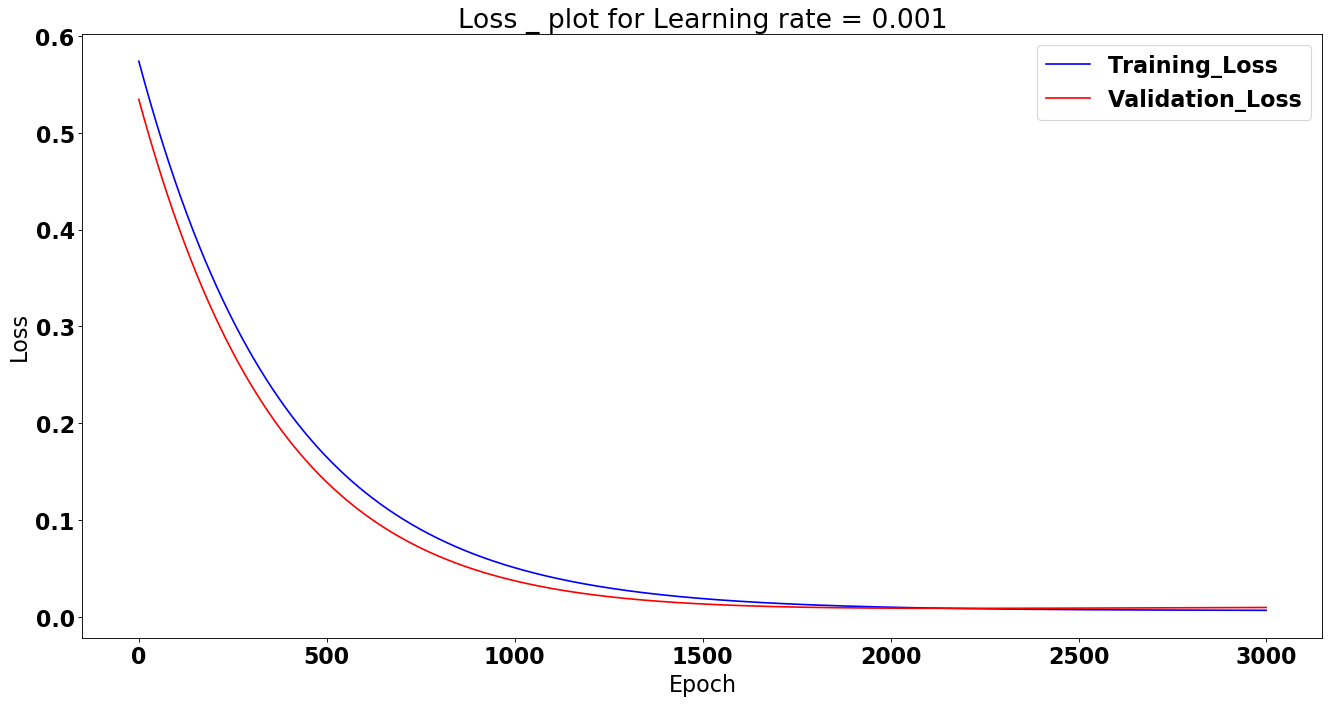

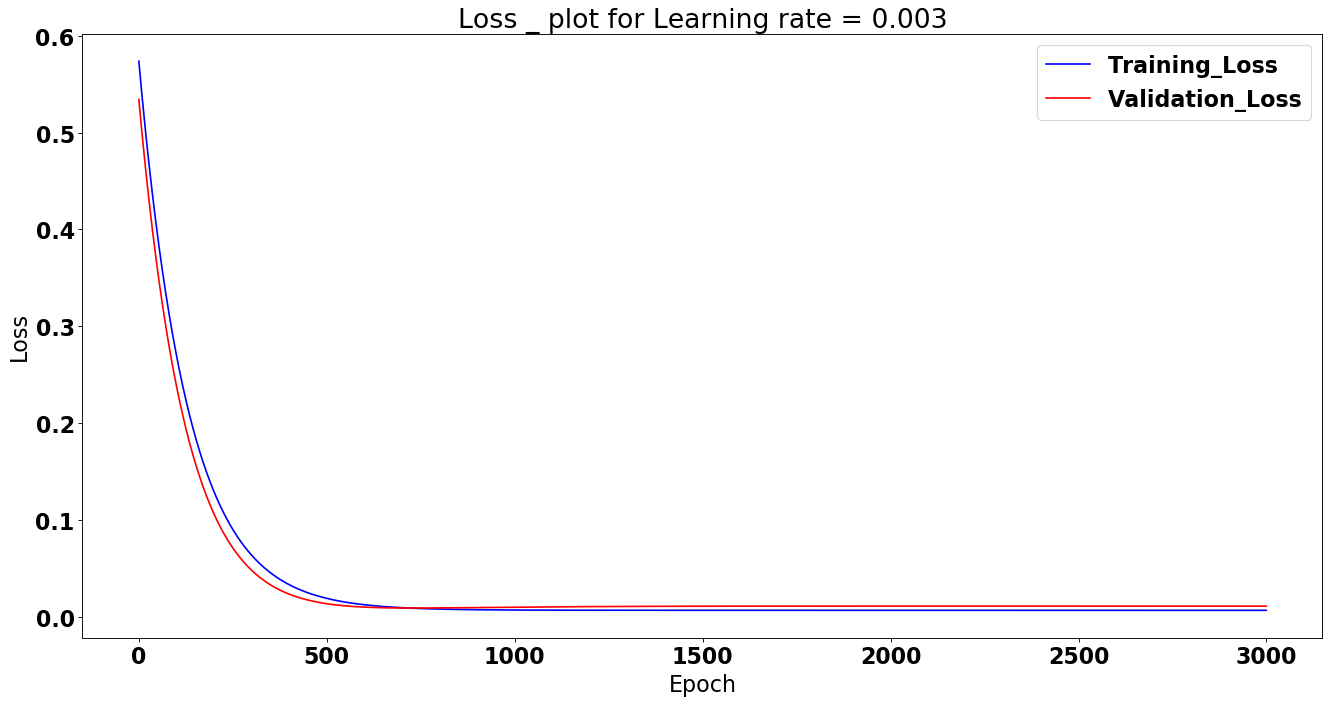

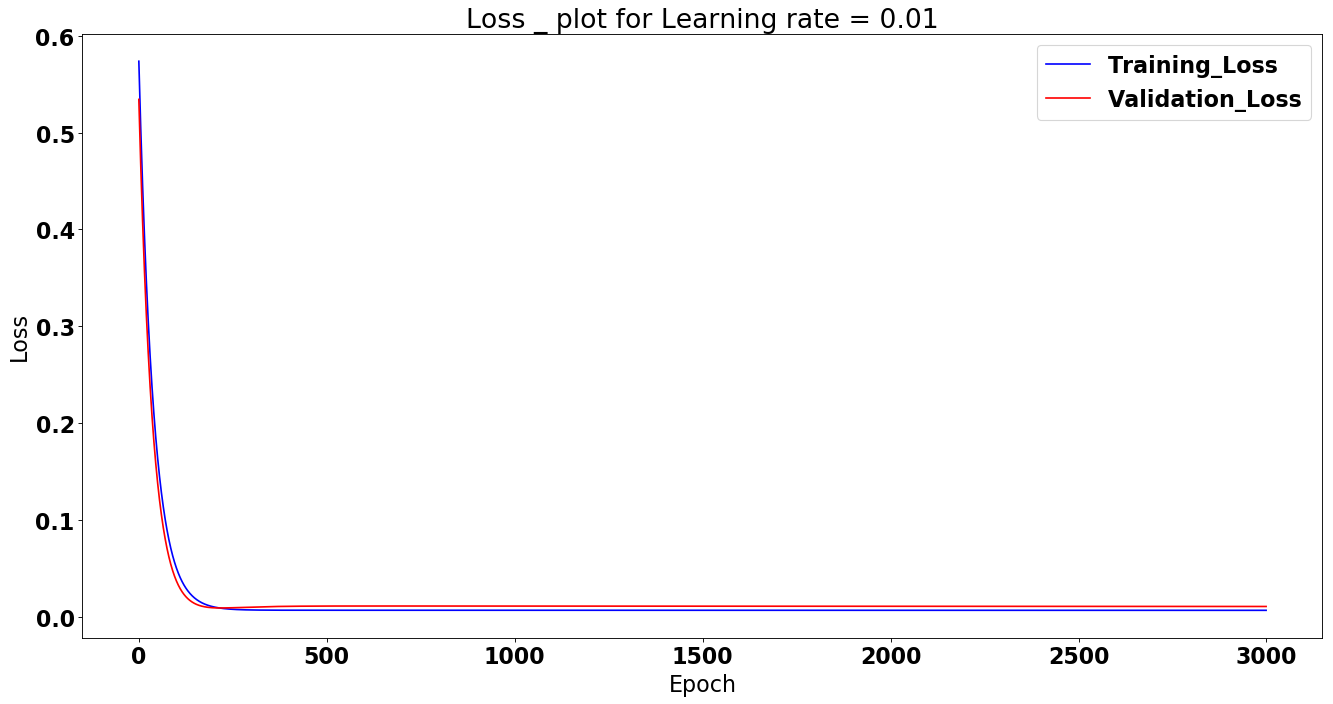

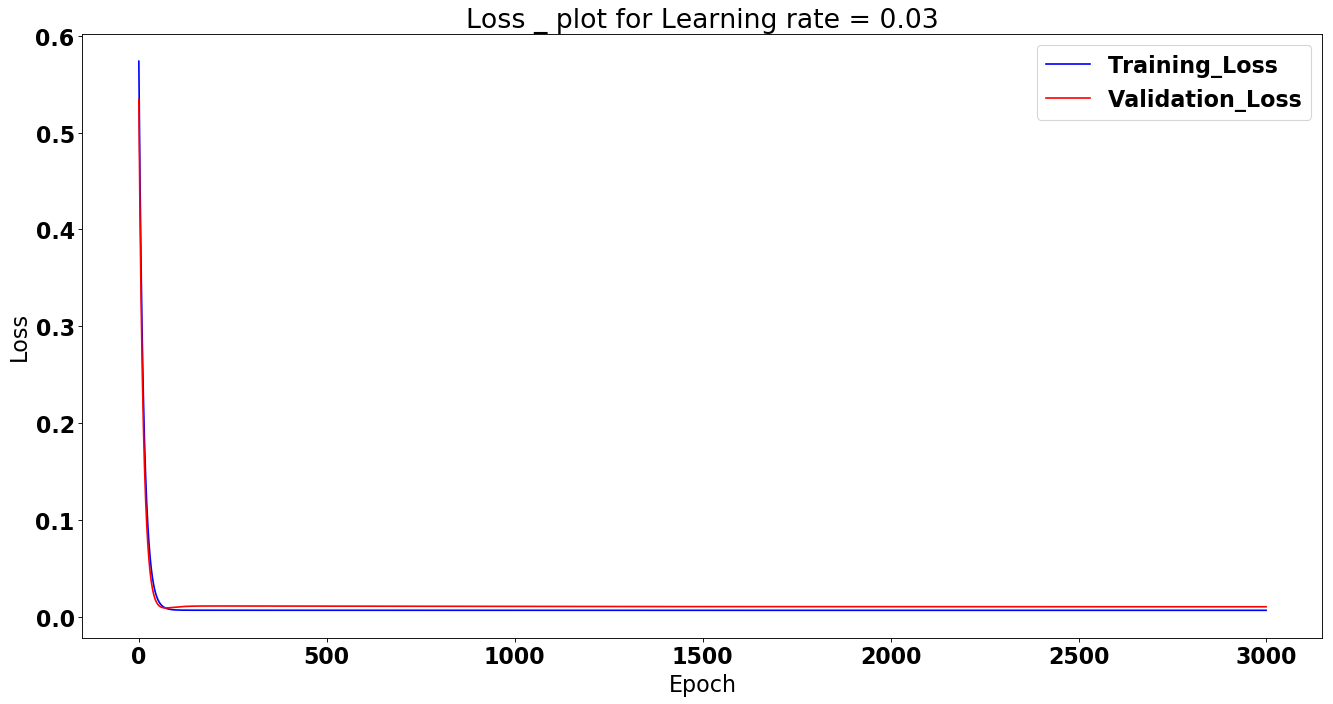

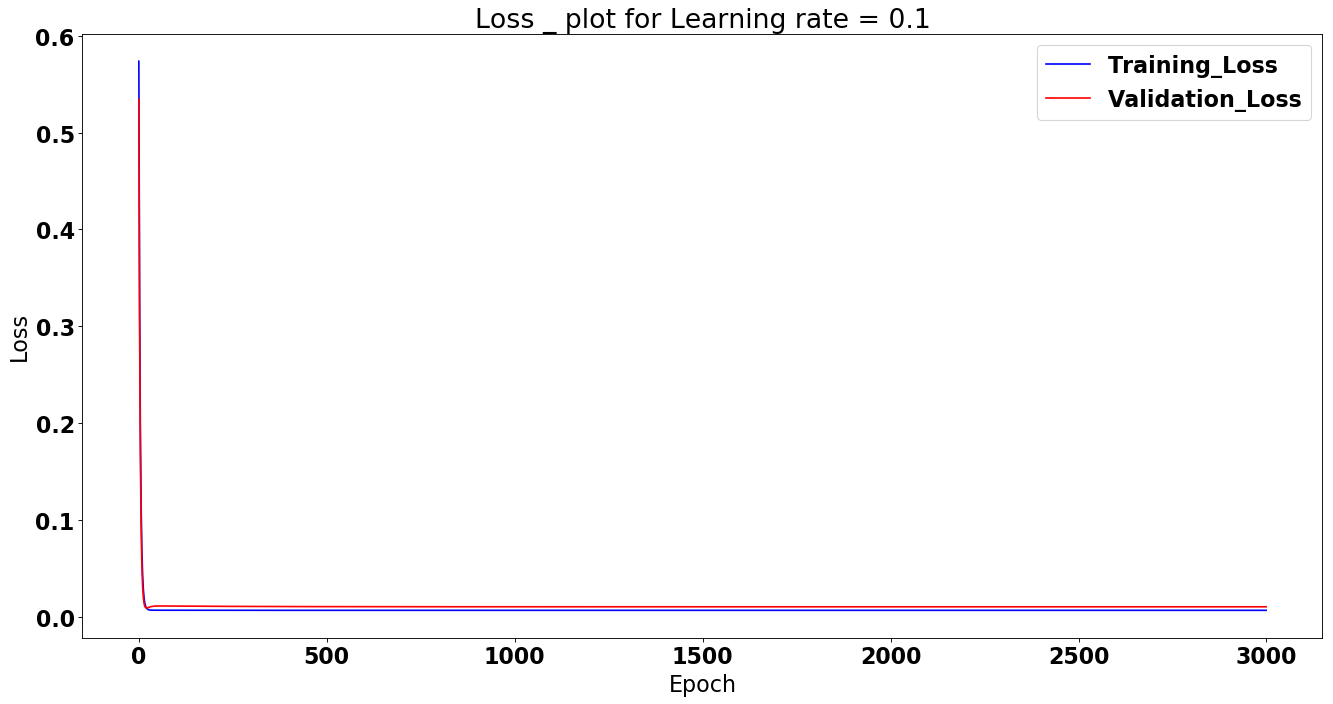

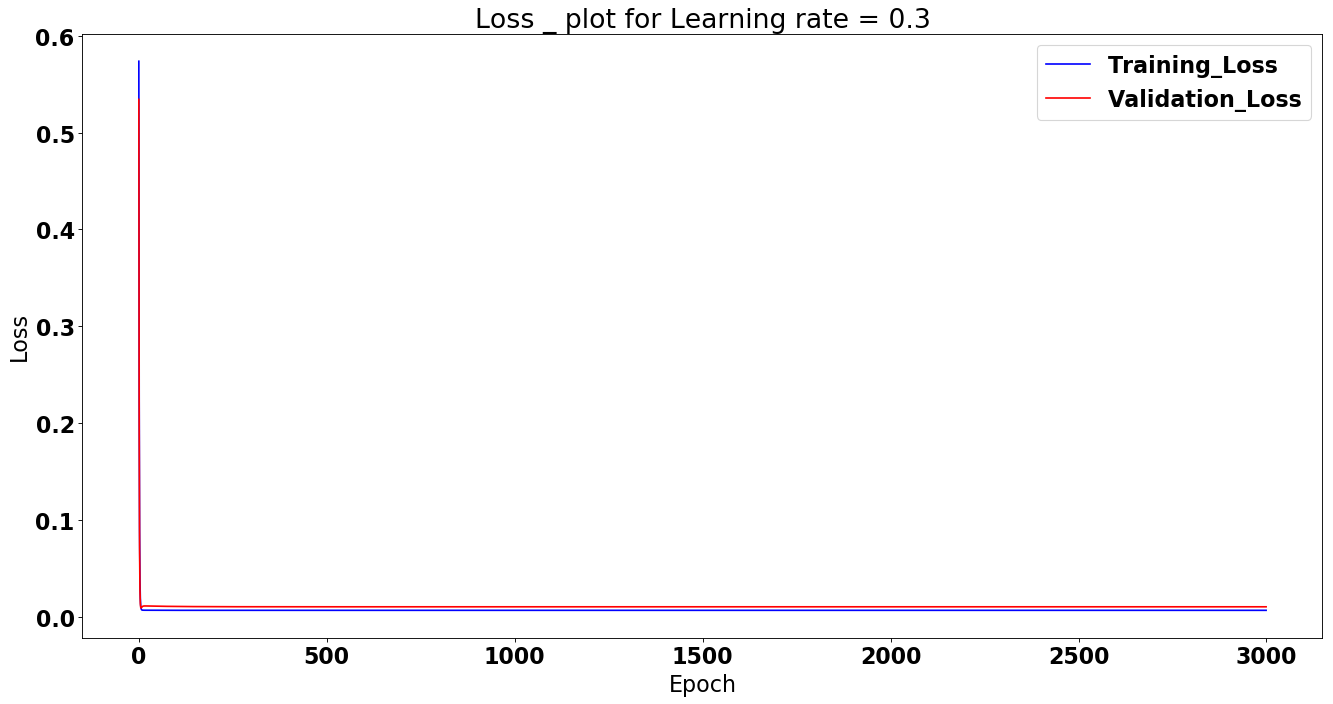

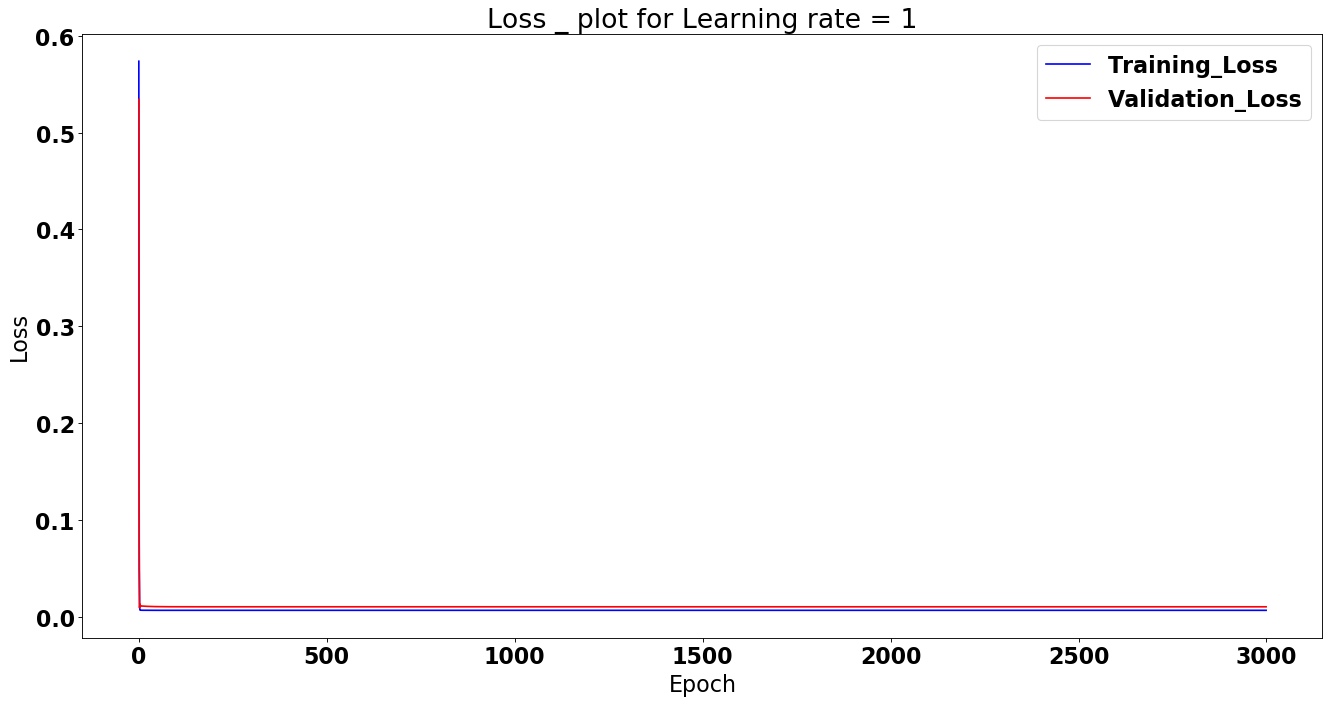

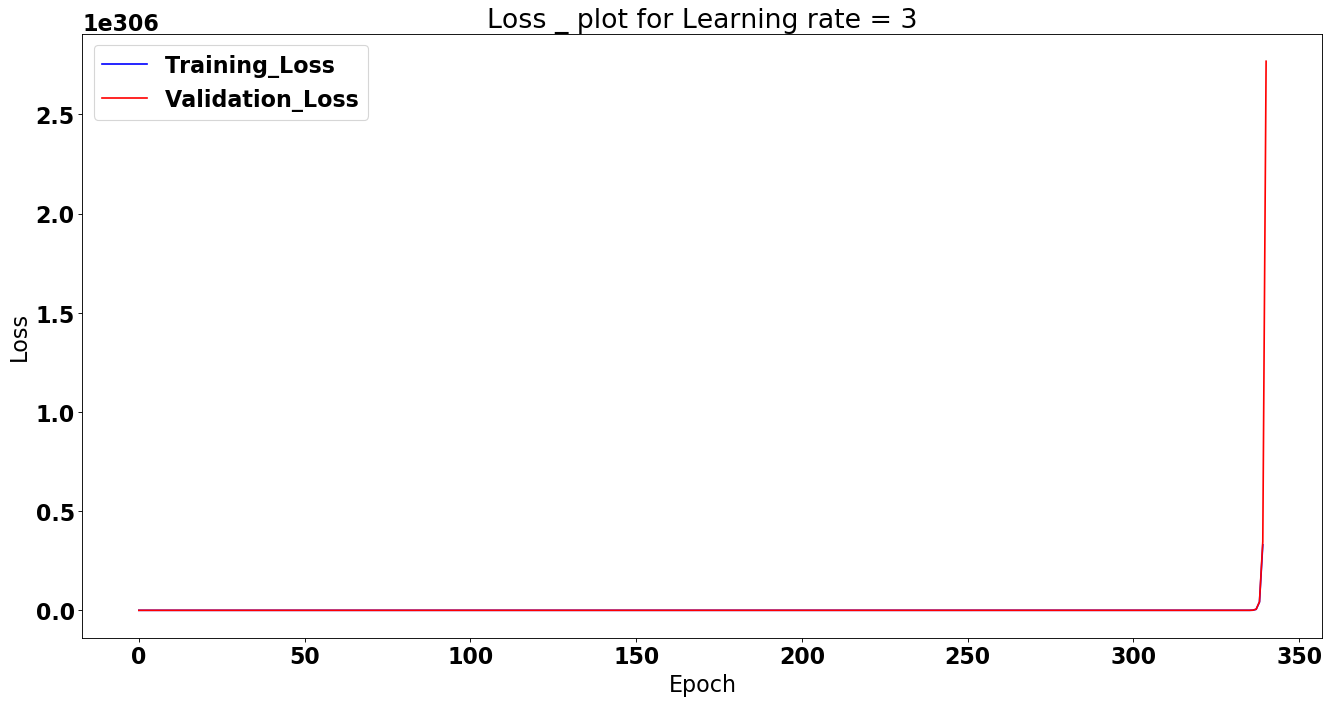

In [42]:
for lr in lr_list:
    plot_summary(curves[lr], str(lr))

In [43]:
lr_list=[0.001, 0.003, 0.01, 0.03, 0.1, 0.3]
print(Weights)

[array([[0.5737858 , 0.18184632]]), array([[0.57788279, 0.15640259]]), array([[0.60883226, 0.13987941]]), array([[0.63451921, 0.12617478]]), array([[0.63830179, 0.12415668]]), array([[0.63830463, 0.12415516]]), array([[0.63830463, 0.12415516]]), array([[nan, nan]])]
